## 试着用 pyzgy 库导入 地震数据


Inline 范围: 205 - 920 (共 716 条)
Crossline 范围: 414 - 1669 (共 1256 条)
样本数: 3500
样本间隔: 2.0
样本范围: -0.0 - 6998.0

显示时间范围: 1600 - 2500
对应索引范围: 800 - 1250


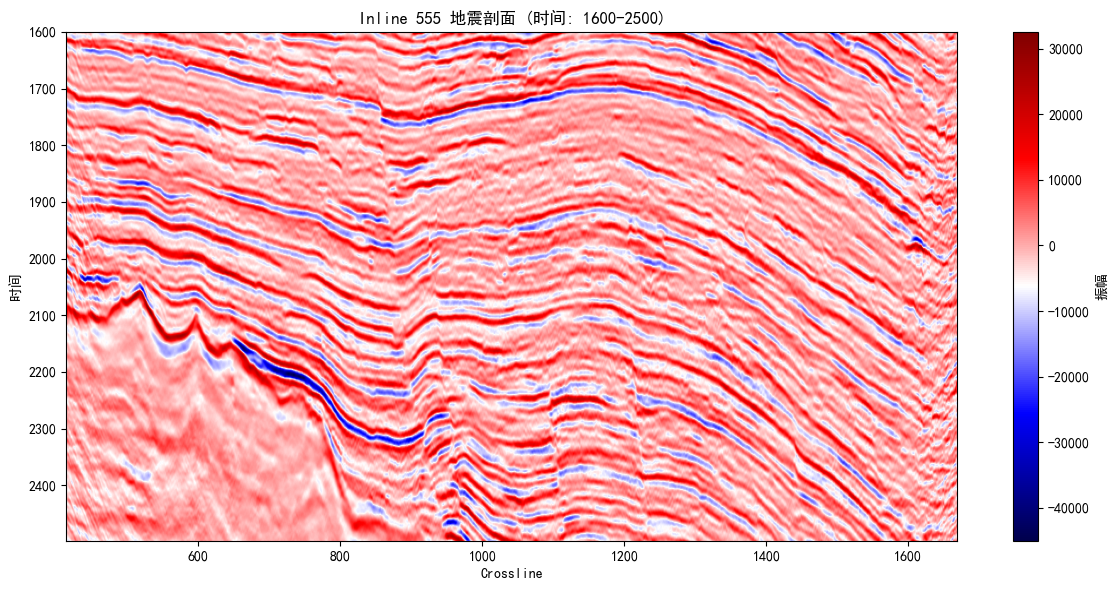

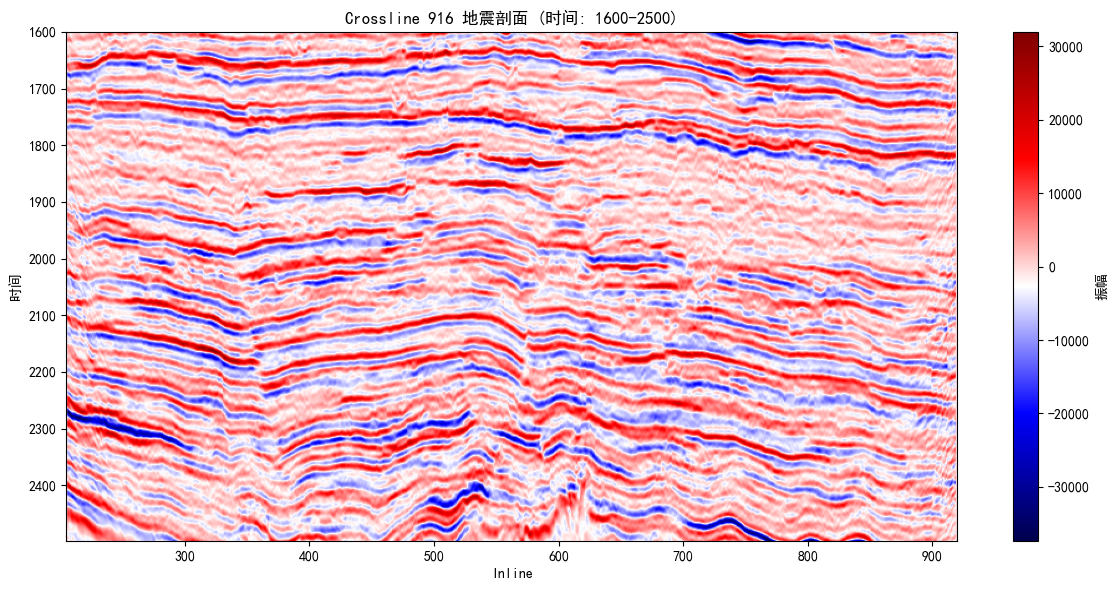

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pyzgy

# 设置中文字体支持
plt.rcParams["font.sans-serif"] = ["SimHei", "DejaVu Sans"]
plt.rcParams["axes.unicode_minus"] = False

# 读取 ZGY 文件
zgy_file = "../data/obn-yuan.zgy"

with pyzgy.open(zgy_file, mode="r") as f:
    # 获取文件的基本信息
    print(f"Inline 范围: {f.ilines[0]} - {f.ilines[-1]} (共 {f.n_ilines} 条)")
    print(f"Crossline 范围: {f.xlines[0]} - {f.xlines[-1]} (共 {f.n_xlines} 条)")
    print(f"样本数: {f.n_samples}")
    print(f"样本间隔: {f.zinc}")
    print(f"样本范围: {f.samples[0]} - {f.samples[-1]}")

    # 确定时间范围的索引
    time_start, time_end = 1600, 2500
    sample_idx_start = np.searchsorted(f.samples, time_start)
    sample_idx_end = np.searchsorted(f.samples, time_end)

    print(f"\n显示时间范围: {time_start} - {time_end}")
    print(f"对应索引范围: {sample_idx_start} - {sample_idx_end}")

    # 随机选择一个 inline 剖面
    random_inline_idx = np.random.randint(0, f.n_ilines)
    random_inline_no = f.ilines[random_inline_idx]

    # 读取该 inline 剖面并切片
    inline_data = f.read_inline_number(random_inline_no)
    inline_data_cropped = inline_data[:, sample_idx_start:sample_idx_end]

    # 显示剖面
    plt.figure(figsize=(12, 6))
    plt.imshow(
        inline_data_cropped.T,
        cmap="seismic",
        aspect="auto",
        extent=[f.xlines[0], f.xlines[-1], f.samples[sample_idx_end - 1], f.samples[sample_idx_start]],  # type:ignore
    )
    plt.colorbar(label="振幅")
    plt.xlabel("Crossline")
    plt.ylabel("时间")
    plt.title(f"Inline {random_inline_no} 地震剖面 (时间: {time_start}-{time_end})")
    plt.tight_layout()
    plt.show()

    # 也可以尝试显示 crossline 剖面
    random_xline_idx = np.random.randint(0, f.n_xlines)
    random_xline_no = f.xlines[random_xline_idx]
    xline_data = f.read_crossline_number(random_xline_no)
    xline_data_cropped = xline_data[:, sample_idx_start:sample_idx_end]

    plt.figure(figsize=(12, 6))
    plt.imshow(
        xline_data_cropped.T,
        cmap="seismic",
        aspect="auto",
        extent=[f.ilines[0], f.ilines[-1], f.samples[sample_idx_end - 1], f.samples[sample_idx_start]],  # type:ignore
    )
    plt.colorbar(label="振幅")
    plt.xlabel("Inline")
    plt.ylabel("时间")
    plt.title(f"Crossline {random_xline_no} 地震剖面 (时间: {time_start}-{time_end})")
    plt.tight_layout()
    plt.show()